In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from collections import Counter

import os
from utils import *
from tqdm import tqdm

## Preprocessing

The dataframe ALTRI_FTSEMIB contains data about different equities. Let's split it in different dataframes.

Procedure:
- Load the ALTRI_FTSEMIB dataframe
- Collect the unique ISIN
- for each ISIN filter the dataframe and save the filtered version

In [ ]:
altri_ftsemib = pd.read_csv('C:/Users/User01/Documents/di_nosse/FTSEMIB_MOT/ALTRI_FTSEMIB.csv', sep=';')

unique_isins = altri_ftsemib['ISIN'].unique()
for isin in unique_isins:
    print(f"Processing ISIN {isin}...")
    df_isin = altri_ftsemib[altri_ftsemib['ISIN'] == isin]
    if os.path.exists(f'C:/Users/User01/Documents/di_nosse/FTSEMIB_MOT/{isin}.csv'):
        print(f"File for ISIN {isin} already exists. Skipping...")
        continue
    df_isin.to_csv(f'C:/Users/User01/Documents/di_nosse/FTSEMIB_MOT/{isin}.csv', index=False, sep=';')

In [44]:
mot = pd.read_csv('C:/Users/User01/Documents/di_nosse/FTSEMIB_MOT/MOT.csv', sep=';')

unique_isins = mot['ISIN'].unique()
for isin in unique_isins:
    print(f"Processing ISIN {isin}...")
    df_isin = mot[mot['ISIN'] == isin]
    if os.path.exists(f'C:/Users/User01/Documents/di_nosse/MOT/{isin}.csv'):
        print(f"File for ISIN {isin} already exists. Skipping...")
        continue
    df_isin.to_csv(f'C:/Users/User01/Documents/di_nosse/MOT/{isin}.csv', index=False, sep=';')

Processing ISIN IT0005425233...
Processing ISIN IT0005438004...
Processing ISIN IT0005217390...
Processing ISIN IT0005363111...
Processing ISIN IT0005358806...
Processing ISIN IT0005273013...
Processing ISIN IT0005441883...
Processing ISIN IT0005496770...
Processing ISIN IT0005083057...
Processing ISIN IT0005530032...
Processing ISIN IT0005534141...
Processing ISIN IT0003934657...
Processing ISIN IT0005480980...
Processing ISIN IT0005582421...
Processing ISIN IT0005583486...


## Data explorer

In [3]:
PATH_NEW_DATA_FOLDER = "C:/Users/User01/Documents/di_nosse/FTSEMIB_MOT_NEW"
dfs_path_new = [PATH_NEW_DATA_FOLDER + '/' + path for path in os.listdir(PATH_NEW_DATA_FOLDER) if (path.endswith('.parquet'))]

Processing files: 100%|██████████| 41/41 [00:51<00:00,  1.25s/it]

Total trades processed: 28699815
Total proprietary trades: 15757455
Total client trades: 12942360


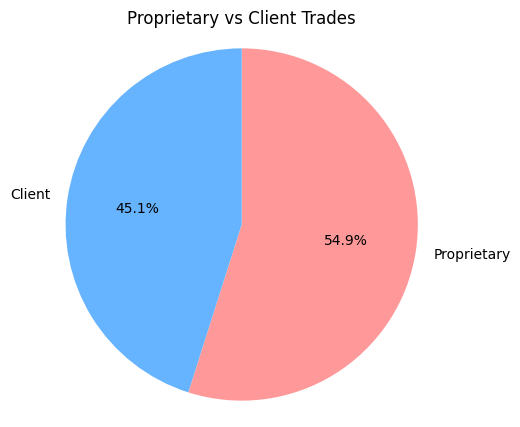

In [36]:
proprietary = 0
client = 0
broker_counter = Counter()
client_counter = Counter()

for path in tqdm(dfs_path_new, desc="Processing files"):
    isin = path.split('/')[-1].split('.')[0]
    trades_members = pd.read_parquet(f'{path}')
    trades_members = trades_members[
        (trades_members['Trade Time'].dt.time >= pd.to_datetime('09:30:00').time()) &
        (trades_members['Trade Time'].dt.time <= pd.to_datetime('17:30:00').time())
    ].copy()

    proprietary += len(trades_members[trades_members['Trade Type Aggressive'] == 'Dealing_on_own_account'])
    client += len(trades_members[trades_members['Trade Type Aggressive'] != 'Dealing_on_own_account'])

    broker_counter.update(trades_members['ID Member'])
    client_counter.update(trades_members['ID Client'])

print(f'Total trades processed: {proprietary + client}')
print(f'Total proprietary trades: {proprietary}')
print(f'Total client trades: {client}')

# Pie chart of proprietary vs client trades
labels = ['Proprietary', 'Client']
sizes = [proprietary, client]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, counterclock=False)
plt.title('Proprietary vs Client Trades')
plt.axis('equal')
plt.show()
    

In [27]:
len(client_counter), len(broker_counter)

(234984, 131)

In [24]:
client_zero_count = client_counter[0]
ratio_client_zero = client_zero_count / sum(client_counter.values())
print(f"Ratio of trades with client == 0: {ratio_client_zero:.4f}")

Ratio of trades with client == 0: 0.5482


In [33]:
for path in tqdm(dfs_path_new[:10], desc="Processing files"):
    isin = path.split('/')[-1].split('.')[0]
    trades_members = pd.read_parquet(f'{path}')
    trades_members = trades_members[
        (trades_members['Trade Time'].dt.time >= pd.to_datetime('09:30:00').time()) &
        (trades_members['Trade Time'].dt.time <= pd.to_datetime('17:30:00').time())
    ].copy()
    display(trades_members[trades_members['Trade Type Aggressive'] == 'Dealing_on_own_account']['ID Client'].value_counts())

Processing files:   0%|          | 0/10 [00:00<?, ?it/s]

ID Client
 0             282103
 400182693         51
 400281082         37
 400156906         31
 400178619         27
 400155885         24
 1                 17
 400204508         13
 400175747         13
 400277886         13
 400164790         12
 400224635         12
 400161330         11
 400396643          9
 400214653          7
 400215450          7
 1001402001         7
 1000774001         6
 400281932          6
 1001571001         6
 400230974          5
 10                 5
 400197929          5
 200003093          4
 400359074          4
 2                  4
 400214120          4
 400246990          3
 400170387          3
 400273216          2
 400174365          2
 400204985          2
 400254568          2
 36316349           1
 400184558          1
 446389             1
 400286148          1
 400137849          1
 400282199          1
 400216747          1
 1329780            1
 150683835          1
 122759             1
 1348               1
 400215202          1


Processing files:  10%|█         | 1/10 [00:00<00:07,  1.25it/s]

ID Client
0             246343
400285631        282
400277886         78
400175747         63
1                 36
400209346         23
400156906         22
400246990         13
400155885         12
400224635         11
400273216         11
400290219         11
400221923         10
10                10
400214653          9
400204508          9
1001414001         8
400215450          7
400197357          5
400204985          4
400182693          4
400170387          3
400197929          3
1001508001         3
1000774001         3
400218431          2
400218151          2
1000611001         2
400141437          1
2                  1
1000679001         1
400145825          1
1001149001         1
400349088          1
400281082          1
400217442          1
1001016            1
1001504001         1
Name: count, dtype: int64

Processing files:  20%|██        | 2/10 [00:01<00:05,  1.40it/s]

ID Client
0             529082
400277886         98
400306551         66
400175747         53
400281082         32
400291404         30
400281932         28
400286148         18
400140980         17
400224635         17
400180602         16
400349088         13
400156906         13
400204508         10
400270288         10
400209258         10
400230974          9
400254780          7
400197929          7
400182693          7
400216747          5
400318094          5
1001571001         5
1000774001         3
400359074          3
400155885          2
400161265          2
1001508001         2
400215450          2
3535991            1
1000679001         1
1000004148         1
1979378            1
10                 1
400253378          1
36316349           1
Name: count, dtype: int64

Processing files:  30%|███       | 3/10 [00:02<00:06,  1.01it/s]

ID Client
 0             262051
 400224635         57
 400246990         50
 400218151         47
 400175747         44
 400270288         21
 400239824         21
 400204508         19
 400290219         14
 400184651         13
 400281932         12
 400277886         12
 400281082         11
 400152325         11
 400286148         10
 400350796          9
 400145825          7
 400164790          7
 400253378          5
 400209258          5
 400155885          4
 1001504001         4
 400221923          3
 400171530          3
 400156906          3
 400209346          3
 400336368          3
 400349088          3
 400218431          3
 400260622          3
 400172933          2
 400286375          2
 1                  2
 400215450          2
 1001564001         2
 400214653          2
 1000679001         2
 400141437          1
 400220235          1
 400359074          1
 400144491          1
 400216747          1
 400215202          1
 400292506          1
 10                 1


Processing files:  40%|████      | 4/10 [00:03<00:05,  1.16it/s]

ID Client
0             1351026
400182693         263
400142702         232
400224635         192
1                 165
               ...   
400218431           1
1000974001          1
400231769           1
400220616           1
400161533           1
Name: count, Length: 92, dtype: int64

Processing files:  50%|█████     | 5/10 [00:06<00:08,  1.60s/it]

ID Client
0            133180
400349088         9
1                 8
400156906         5
400155885         5
400182693         3
400204508         2
400253378         2
10                2
400281082         1
Name: count, dtype: int64

Processing files:  60%|██████    | 6/10 [00:06<00:04,  1.21s/it]

ID Client
0             110808
400220235         77
400155563         32
1                 11
400270288         11
400184844          9
400215450          8
400204508          6
400224635          5
400281932          4
400156906          4
10                 4
400152325          3
400222684          2
400141437          2
400144491          1
400297248          1
150685625          1
400246733          1
400290219          1
400184417          1
1001097001         1
Name: count, dtype: int64

Processing files:  70%|███████   | 7/10 [00:07<00:02,  1.08it/s]

ID Client
0             81344
400171530        35
400218151        34
400220235        32
400184844        23
400152325        15
400184651        11
10               10
400164790         9
400277886         7
1000679002        7
400156906         6
400224635         6
400432265         5
400349088         4
1                 4
400281932         3
400221923         3
400216747         3
400246990         3
400290219         3
400209258         3
400382171         3
400175747         2
400155885         2
1000904001        1
400276600         1
400225807         1
1001504001        1
400266407         1
400182693         1
1001571001        1
16963             1
Name: count, dtype: int64

Processing files:  80%|████████  | 8/10 [00:07<00:01,  1.40it/s]

ID Client
0             163591
400156906         70
400204508         21
400197929         20
400281082         14
400246990          9
400349088          8
1000774001         7
400180602          7
400254568          6
400218151          3
400173033          3
400216313          3
400221923          2
3001               2
10                 2
400215450          1
1000679001         1
150039489          1
Name: count, dtype: int64

Processing files:  90%|█████████ | 9/10 [00:07<00:00,  1.58it/s]

ID Client
0             95375
400156906        40
400281082        27
400204985        22
400277886        17
400349088         7
1000774001        2
400180602         2
400216747         1
10                1
400246990         1
Name: count, dtype: int64

Processing files: 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


In [34]:
for path in tqdm(dfs_path_new[:10], desc="Processing files"):
    isin = path.split('/')[-1].split('.')[0]
    trades_members = pd.read_parquet(f'{path}')
    trades_members = trades_members[
        (trades_members['Trade Time'].dt.time >= pd.to_datetime('09:30:00').time()) &
        (trades_members['Trade Time'].dt.time <= pd.to_datetime('17:30:00').time())
    ].copy()
    display(trades_members[trades_members['Trade Type Aggressive'] != 'Dealing_on_own_account']['ID Client'].value_counts())

Processing files:   0%|          | 0/10 [00:00<?, ?it/s]

ID Client
10250181     46976
23523        23227
50319961     14994
400143446    12343
2902791      10786
             ...  
27686236         1
6649960          1
31036749         1
33204059         1
47909223         1
Name: count, Length: 16886, dtype: int64

Processing files:  10%|█         | 1/10 [00:00<00:07,  1.20it/s]

ID Client
10250181      49176
23523         21844
50319961      16208
1000004314     9642
2902791        9363
              ...  
1435892           1
10886             1
21415496          1
1083198320        1
200615825         1
Name: count, Length: 11940, dtype: int64

Processing files:  20%|██        | 2/10 [00:01<00:05,  1.36it/s]

ID Client
10250181     93543
23523        37949
50319961     32953
1126         28719
2902791      12992
             ...  
202779337        1
41803            1
667              1
11394034         1
200467177        1
Name: count, Length: 19041, dtype: int64

Processing files:  30%|███       | 3/10 [00:02<00:06,  1.01it/s]

ID Client
10250181      47539
23523         22186
50319961      16202
2902791       14371
1000004314     7204
              ...  
201936509         1
200453693         1
202001574         1
200932343         1
203100010         1
Name: count, Length: 12802, dtype: int64

Processing files:  40%|████      | 4/10 [00:03<00:05,  1.16it/s]

ID Client
10250181      225664
2902791        54349
50319961       47444
23523          44823
5493           37903
               ...  
1003532406         1
10327975           1
202081492          1
201489934          1
1091871336         1
Name: count, Length: 54677, dtype: int64

Processing files:  50%|█████     | 5/10 [00:06<00:08,  1.67s/it]

ID Client
10250181      26444
23523         15047
50319961      13521
1000004148    10639
1472           8529
              ...  
201536849         1
31436461          1
203462640         1
200474920         1
59248884          1
Name: count, Length: 6798, dtype: int64

Processing files:  60%|██████    | 6/10 [00:07<00:05,  1.26s/it]

ID Client
10250181      19488
23523         13487
50319961       9401
400143446      3649
1000004314     3613
              ...  
200808028         1
1605563           1
201419024         1
202029379         1
1025247006        1
Name: count, Length: 3902, dtype: int64

Processing files:  70%|███████   | 7/10 [00:07<00:02,  1.05it/s]

ID Client
10250181      12727
23523          9940
50319961       6640
1000004314     3690
196091         3635
              ...  
203452385         1
201650500         1
200125404         1
201557516         1
203474238         1
Name: count, Length: 3149, dtype: int64

Processing files:  80%|████████  | 8/10 [00:07<00:01,  1.36it/s]

ID Client
10250181      28768
23523         18388
50319961      12293
1000004314     5125
2902791        5085
              ...  
68486639          1
3418424           1
865488            1
203102235         1
140382            1
Name: count, Length: 7686, dtype: int64

Processing files:  90%|█████████ | 9/10 [00:08<00:00,  1.53it/s]

ID Client
10250181      14728
23523         13450
50319961       6422
1000004314     3621
400143446      2884
              ...  
2743391           1
13059727          1
201788147         1
201410679         1
370765401         1
Name: count, Length: 5113, dtype: int64

Processing files: 100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


In [ ]:
# Load the metaorders dataframes
metaorders_proprietary = pd.read_parquet('out_files/metaorders_info_sameday_filtered_member_proprietary.parquet')
metaorders_non_proprietary = pd.read_parquet('out_files/metaorders_info_sameday_filtered_member_non_proprietary.parquet')

# Function to extract date from the Period column (list of timestamps)
def extract_date(period_list):
    if len(period_list) > 0:
        return pd.to_datetime(period_list[0]).date()
    return None

# Apply the function to get the date
metaorders_proprietary['Date'] = metaorders_proprietary['Period'].apply(extract_date)
metaorders_non_proprietary['Date'] = metaorders_non_proprietary['Period'].apply(extract_date)

# Count metaorders per day
prop_counts = metaorders_proprietary.groupby('Date').size().rename('Proprietary')
client_counts = metaorders_non_proprietary.groupby('Date').size().rename('Client')

# Combine into a single dataframe
daily_metaorders = pd.concat([prop_counts, client_counts], axis=1).fillna(0).astype(int)
daily_metaorders.index = pd.to_datetime(daily_metaorders.index)
daily_metaorders = daily_metaorders.sort_index()

print(daily_metaorders.head())

FileNotFoundError: [Errno 2] No such file or directory: 'out_files/metaorders_info_sameday_filtered_member_proprietary.parquet'

In [1]:
import pandas as pd

pd.read_parquet('out_files/metaorders_info_sameday_filtered_member_non_proprietary.parquet')

,ISIN,Member,Client,Direction,Price Change,Daily Vol,Q,Q/V,Participation Rate,N Child,Period
0,IT0000062072,91096,1126,-1,0.000844,401532,709.0,0.001766,0.025336,2,"[2024-06-03T15:08:46.533298, 2024-06-03T15:41:..."
1,IT0000062072,91096,1126,1,0.005466,524773,520.0,0.000991,0.004665,3,"[2024-06-06T14:38:51.747916, 2024-06-06T16:07:..."
2,IT0000062072,91096,1126,-1,0.000839,524773,450.0,0.000858,0.014089,2,"[2024-06-06T16:13:43.120247, 2024-06-06T16:51:..."
3,IT0000062072,91096,1092,-1,0.001270,501709,600.0,0.001196,0.039355,2,"[2024-06-10T11:25:15.905795, 2024-06-10T11:35:..."
4,IT0000062072,91096,1126,1,-0.002550,781135,250.0,0.000320,0.004919,2,"[2024-06-11T11:46:51.127009, 2024-06-11T12:12:..."
...,...,...,...,...,...,...,...,...,...,...,...
682881,NL0015435975,96828,5493,1,0.000000,2020927,43420.0,0.021485,0.147121,16,"[2025-05-30T14:09:33.993048, 2025-05-30T15:32:..."
682882,NL0015435975,96828,5493,1,-0.000694,2020927,5301.0,0.002623,0.901684,3,"[2025-05-30T15:34:55.319651, 2025-05-30T15:37:..."
682883,NL0015435975,96828,5493,1,-0.001731,2020927,17861.0,0.008838,0.186009,6,"[2025-05-30T15:46:18.640139, 2025-05-30T16:15:..."
682884,NL0015435975,96828,5493,-1,-0.003131,2020927,12782.0,0.006325,0.085883,2,"[2025-05-30T16:21:02.828230, 2025-05-30T16:57:..."
